In [1]:
import os
import pandas as pd

os.chdir('C:\\Users\\Jonas\\Desktop\\UChicago\\term_6\\AdvancedMachineLearning\\supreme_court_nlp')

In [2]:
dataset_paths = os.listdir('data')

dataset = pd.read_csv(
    f'data/{dataset_paths[0]}',
    nrows=0
)
justices = [col for col in dataset.columns if col.startswith('votes_side_j__')]
cols = ['case_id'] + justices + ['win_side']

case_votes = pd.DataFrame()
for dataset_path in dataset_paths:
    dataset = pd.read_csv(
        f'data/{dataset_path}',
        usecols=cols
    ).drop_duplicates(
        subset='case_id',
        keep='first',
        ignore_index=True
    )
    case_votes = pd.concat(
        [case_votes, pd.DataFrame(dataset)],
        ignore_index=True
    )

vote_counts = case_votes[['win_side'] + justices].apply(
        lambda vote: vote.value_counts(dropna=True)
    )   

baselines = pd.DataFrame(
    vote_counts.apply(
        lambda col: col.max() / col.sum(),
        axis=0
    ).dropna(),
    columns=['baseline']
)

nb_cases = pd.DataFrame(
    case_votes[['win_side'] + justices].count(),
    columns=['nb_cases']
)

baselines = nb_cases.join(baselines, how='right')

baselines.to_csv('eda/new_baselines.csv')

baselines

,nb_cases,baseline
win_side,1404,0.655271
votes_side_j__anthony_m_kennedy,1276,0.658307
votes_side_j__antonin_scalia,1096,0.626825
votes_side_j__brett_m_kavanaugh,117,0.615385
votes_side_j__clarence_thomas,1401,0.581014
votes_side_j__david_h_souter,669,0.600897
votes_side_j__elena_kagan,615,0.596748
votes_side_j__john_g_roberts_jr,1015,0.645320
votes_side_j__john_paul_stevens,745,0.569128
votes_side_j__neil_gorsuch,199,0.597990


In [3]:
results = pd.read_csv('notebooks/BERT_results.csv')
results = results.set_index('justice')[['test_accuracy']]
results.index.name = None
results = baselines.join(results)
results

,nb_cases,baseline,test_accuracy
win_side,1404,0.655271,0.680952
votes_side_j__anthony_m_kennedy,1276,0.658307,0.689474
votes_side_j__antonin_scalia,1096,0.626825,0.658537
votes_side_j__brett_m_kavanaugh,117,0.615385,0.611111
votes_side_j__clarence_thomas,1401,0.581014,0.617225
votes_side_j__david_h_souter,669,0.600897,0.640000
votes_side_j__elena_kagan,615,0.596748,0.571429
votes_side_j__john_g_roberts_jr,1015,0.645320,0.662252
votes_side_j__john_paul_stevens,745,0.569128,0.410714
votes_side_j__neil_gorsuch,199,0.597990,0.633333


In [4]:
results['difference'] = results['test_accuracy'] - results['baseline']
results['improvement'] = results['difference'].apply(lambda diff: diff>0)
results

,nb_cases,baseline,test_accuracy,difference,improvement
win_side,1404,0.655271,0.680952,0.025682,True
votes_side_j__anthony_m_kennedy,1276,0.658307,0.689474,0.031166,True
votes_side_j__antonin_scalia,1096,0.626825,0.658537,0.031712,True
votes_side_j__brett_m_kavanaugh,117,0.615385,0.611111,-0.004274,False
votes_side_j__clarence_thomas,1401,0.581014,0.617225,0.036211,True
votes_side_j__david_h_souter,669,0.600897,0.640000,0.039103,True
votes_side_j__elena_kagan,615,0.596748,0.571429,-0.025319,False
votes_side_j__john_g_roberts_jr,1015,0.645320,0.662252,0.016931,True
votes_side_j__john_paul_stevens,745,0.569128,0.410714,-0.158413,False
votes_side_j__neil_gorsuch,199,0.597990,0.633333,0.035343,True


In [5]:
results['difference'].describe()

count    16.000000
mean      0.002565
std       0.062063
min      -0.158413
25%      -0.020433
50%       0.028424
75%       0.036374
max       0.072261
Name: difference, dtype: float64

In [6]:
results['improvement'].value_counts()

True     10
False     6
Name: improvement, dtype: int64

In [13]:
results.sort_values(
    by='difference',
    ascending=False,
    inplace=True
)
results

,nb_cases,baseline,test_accuracy,difference,improvement
votes_side_j__sonia_sotomayor,720,0.581944,0.654206,0.072261,True
votes_side_j__samuel_a_alito_jr,981,0.594292,0.657534,0.063243,True
votes_side_j__david_h_souter,669,0.600897,0.640000,0.039103,True
votes_side_j__stephen_g_breyer,1390,0.620144,0.657005,0.036861,True
votes_side_j__clarence_thomas,1401,0.581014,0.617225,0.036211,True
votes_side_j__neil_gorsuch,199,0.597990,0.633333,0.035343,True
votes_side_j__antonin_scalia,1096,0.626825,0.658537,0.031712,True
votes_side_j__anthony_m_kennedy,1276,0.658307,0.689474,0.031166,True
win_side,1404,0.655271,0.680952,0.025682,True
votes_side_j__john_g_roberts_jr,1015,0.645320,0.662252,0.016931,True


<AxesSubplot:>

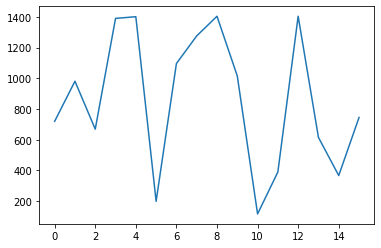

In [16]:
results['nb_cases'].reset_index(drop=True).plot()